<a href="https://colab.research.google.com/github/alamgircanb/Project-for-learning/blob/main/Data_Manipulation_with_Pandas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Pandas Data Manipulation with Matplotlib

Welcome to this tutorial on data manipulation with **Pandas**, now with some **Matplotlib** plots! We’ll go through:

1. **Selecting and filtering** data (loc, iloc, boolean masking)
2. **Handling missing data**
3. **String operations**
4. **Grouping and aggregating**
5. **Merging** DataFrames
6. **Applying lambda functions**
7. **Date/Time** manipulations
8. **Graphing data** with Matplotlib
9. A final **challenge** section

Let's get started!

## 1. Installing and Importing Libraries

If you don’t have Pandas or Matplotlib installed locally, run:
```
pip install pandas matplotlib
```
In Google Colab or Jupyter, you can run `!pip install` inside a cell. Below, we’ll do it just in case.

In [ ]:
import sys
!{sys.executable} -m pip install --quiet pandas matplotlib

Now, let's import **Pandas**, **NumPy**, and **Matplotlib**:

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Ensures plots display inline in Jupyter/Colab
%matplotlib inline


# Adjust some display settings
pd.set_option('display.max_rows', 6)
pd.set_option('display.max_columns', 6)
pd.set_option('display.width', 100)

## 2. Creating a Sample DataFrame

We'll make a small DataFrame with some fictional student data.

In [ ]:
df_students = pd.DataFrame({
    'Name': ['Alice', 'Bob', 'Charlie', 'David', 'Eve'],
    'Score': [85, 92, np.nan, 88, 76],
    'City': ['New York', 'Paris', 'London', 'New York', None],
    'DOB': ['2001-05-10', '2000-07-04', '1999-12-31', '2001-08-20', '2002-09-15']
})

# Convert DOB column to actual datetime
df_students['DOB'] = pd.to_datetime(df_students['DOB'])

df_students

,Name,Score,City,DOB
0,Alice,85.0,New York,2001-05-10
1,Bob,92.0,Paris,2000-07-04
2,Charlie,NaN,London,1999-12-31
3,David,88.0,New York,2001-08-20
4,Eve,76.0,None,2002-09-15


> We have:
- A missing value in `Score` (Charlie)
- A missing value in `City` (Eve)
- A column of date strings (`DOB`) converted to Pandas datetime.

## 3. Selecting and Filtering Data
### 3.1 Selecting Columns
You can select columns using dictionary-like notation (`df['column']`).

In [ ]:
# Select the 'Name' column
df_students['Name']

,Name
0,Alice
1,Bob
2,Charlie
3,David
4,Eve


### 3.2 Selecting Rows by Index with `loc` and `iloc`
 - `loc`: label-based indexing
 - `iloc`: integer position-based indexing

In [ ]:
# loc to get rows by label
df_students.loc[0]

,0
Name,Alice
Score,85.0
City,New York
DOB,2001-05-10 00:00:00


In [ ]:
# iloc to get rows by integer position
df_students.iloc[1:3]

,Name,Score,City,DOB
1,Bob,92.0,Paris,2000-07-04
2,Charlie,NaN,London,1999-12-31


### 3.3 Boolean Masking
We can **filter** rows by conditions, e.g. `Score >= 85`.

In [ ]:
df_students[df_students['Score'] >= 85]

,Name,Score,City,DOB
0,Alice,85.0,New York,2001-05-10
1,Bob,92.0,Paris,2000-07-04
3,David,88.0,New York,2001-08-20


## 4. Handling Missing Data
### 4.1 Detecting Missing Values
`isna()` or `isnull()` returns a boolean mask.

In [ ]:
df_students.isna()

,Name,Score,City,DOB
0,False,False,False,False
1,False,False,False,False
2,False,True,False,False
3,False,False,False,False
4,False,False,True,False


### 4.2 Dropping Missing Values
You can drop rows (or columns) that contain **NaN** values with `dropna()`.

In [ ]:
df_no_missing = df_students.dropna()
df_no_missing

,Name,Score,City,DOB
0,Alice,85.0,New York,2001-05-10
1,Bob,92.0,Paris,2000-07-04
3,David,88.0,New York,2001-08-20


### 4.3 Filling Missing Values
Alternatively, fill missing values with a default or computed value using `fillna()`.

In [ ]:
df_filled = df_students.copy()
df_filled['Score'] = df_filled['Score'].fillna(0)
df_filled['City'] = df_filled['City'].fillna('Unknown')
df_filled

,Name,Score,City,DOB
0,Alice,85.0,New York,2001-05-10
1,Bob,92.0,Paris,2000-07-04
2,Charlie,0.0,London,1999-12-31
3,David,88.0,New York,2001-08-20
4,Eve,76.0,Unknown,2002-09-15


## 5. String Operations
You can use **vectorized string methods** via `df.column.str.<method>`. For example, let's create a new column of uppercase city names.

In [ ]:
df_students['City_Upper'] = df_students['City'].str.upper()
df_students

,Name,Score,City,DOB,City_Upper
0,Alice,85.0,New York,2001-05-10,NEW YORK
1,Bob,92.0,Paris,2000-07-04,PARIS
2,Charlie,NaN,London,1999-12-31,LONDON
3,David,88.0,New York,2001-08-20,NEW YORK
4,Eve,76.0,None,2002-09-15,None


## 6. Grouping and Aggregation
We can **group** by one or more columns, and then **aggregate** (sum, mean, count, etc.). Let's group by `City` and compute the mean of `Score`.

In [ ]:
df_students.groupby('City')['Score'].mean()

,Score
City,
London,NaN
New York,86.5
Paris,92.0


In [ ]:
# Multiple aggregations example:
df_students.groupby('City')['Score'].agg(['mean', 'max', 'min', 'count'])

,mean,max,min,count
City,,,,
London,NaN,NaN,NaN,0
New York,86.5,88.0,85.0,2
Paris,92.0,92.0,92.0,1


## 7. Merging DataFrames

We'll create a second DataFrame with some additional info about each student (their major), then **merge** them.

In [ ]:
df_majors = pd.DataFrame({
    'Name': ['Alice', 'Bob', 'Charlie', 'David', 'Fiona'],
    'Major': ['Math', 'History', 'Chemistry', 'Art', 'Physics']
})

df_merged = pd.merge(df_students, df_majors, on='Name', how='left')
df_merged

,Name,Score,City,DOB,City_Upper,Major
0,Alice,85.0,New York,2001-05-10,NEW YORK,Math
1,Bob,92.0,Paris,2000-07-04,PARIS,History
2,Charlie,NaN,London,1999-12-31,LONDON,Chemistry
3,David,88.0,New York,2001-08-20,NEW YORK,Art
4,Eve,76.0,None,2002-09-15,None,NaN


Notice that **Eve** remains but has a missing `Major`, while **Fiona** appears only in the second DataFrame. Because we used `how='left'`, rows from the left DataFrame (df_students) are kept, and Fiona is excluded.

> If we used `how='outer'`, we'd see rows for both Eve and Fiona, each with missing data from the other side.

## 8. Applying Lambda Functions

Lambda functions are **anonymous functions** in Python. In Pandas, you can use them with `apply()` to transform data. For example, we might create a new column for **birth year**.

In [ ]:
df_students['Birth_Year'] = df_students['DOB'].apply(lambda d: d.year)
df_students

,Name,Score,City,DOB,City_Upper,Birth_Year
0,Alice,85.0,New York,2001-05-10,NEW YORK,2001
1,Bob,92.0,Paris,2000-07-04,PARIS,2000
2,Charlie,NaN,London,1999-12-31,LONDON,1999
3,David,88.0,New York,2001-08-20,NEW YORK,2001
4,Eve,76.0,None,2002-09-15,None,2002


You can also apply a lambda function to **an entire row** by specifying `axis=1` in `apply()`. For example, we can build a custom description string.

In [ ]:
df_students['Description'] = df_students.apply(
    lambda row: f"{row['Name']} (born {row['DOB'].year}) scored {row['Score']}", axis=1
)
df_students

,Name,Score,City,...,City_Upper,Birth_Year,Description
0,Alice,85.0,New York,...,NEW YORK,2001,Alice (born 2001) scored 85.0
1,Bob,92.0,Paris,...,PARIS,2000,Bob (born 2000) scored 92.0
2,Charlie,NaN,London,...,LONDON,1999,Charlie (born 1999) scored nan
3,David,88.0,New York,...,NEW YORK,2001,David (born 2001) scored 88.0
4,Eve,76.0,None,...,None,2002,Eve (born 2002) scored 76.0


## 9. Date/Time Operations
We already converted `DOB` to a datetime, so we can easily extract **day**, **month**, or do calculations (like age). For instance, let's extract the **month name**.

In [ ]:
df_students['DOB_Month'] = df_students['DOB'].dt.month_name()
df_students

,Name,Score,City,...,Birth_Year,Description,DOB_Month
0,Alice,85.0,New York,...,2001,Alice (born 2001) scored 85.0,May
1,Bob,92.0,Paris,...,2000,Bob (born 2000) scored 92.0,July
2,Charlie,NaN,London,...,1999,Charlie (born 1999) scored nan,December
3,David,88.0,New York,...,2001,David (born 2001) scored 88.0,August
4,Eve,76.0,None,...,2002,Eve (born 2002) scored 76.0,September


## 10. Graphing Data with Matplotlib

Pandas integrates nicely with **Matplotlib**. We can call `.plot()` on DataFrames or Series to quickly visualize data.

### 10.1 Bar Plot of Scores
We'll plot a bar chart of each student's **Name** vs. **Score**. Note that Charlie has `NaN`; we can fill it or drop it for plotting.

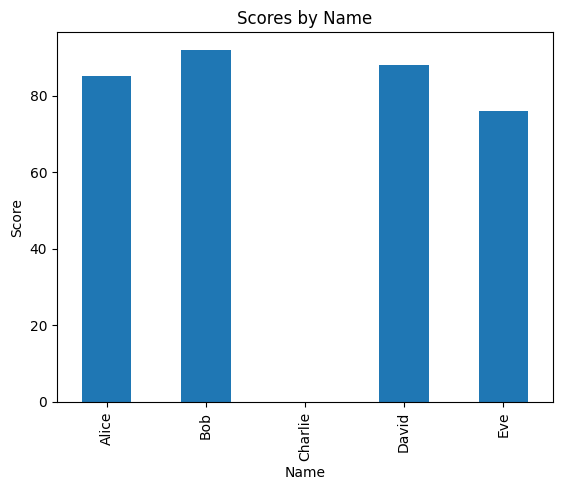

In [ ]:
# Fill missing scores temporarily just for visualization
df_plot = df_students[['Name', 'Score']].copy()
df_plot['Score'] = df_plot['Score'].fillna(0)

df_plot.plot(kind='bar', x='Name', y='Score', title='Scores by Name', legend=False)
plt.ylabel('Score')
plt.show()

### 10.2 Histogram of Scores
A **histogram** shows the distribution of numeric data. We'll ignore missing values. If you have few data points, it may not look very interesting, but it's a good demonstration.

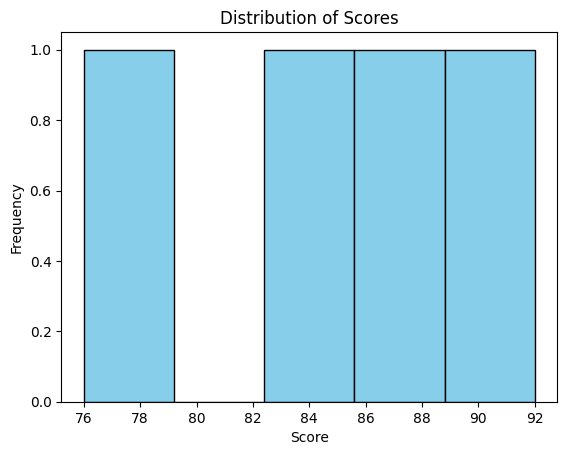

In [ ]:
# Drop NaN scores for histogram
scores_no_nan = df_students['Score'].dropna()
plt.hist(scores_no_nan, bins=5, color='skyblue', edgecolor='black')
plt.title('Distribution of Scores')
plt.xlabel('Score')
plt.ylabel('Frequency')
plt.show()

### 10.3 Grouped Bar (Mean Score by City)
Let’s create a bar chart of **mean Score by City**. We'll use `groupby()` again and then `.plot(kind='bar')` on that Series.

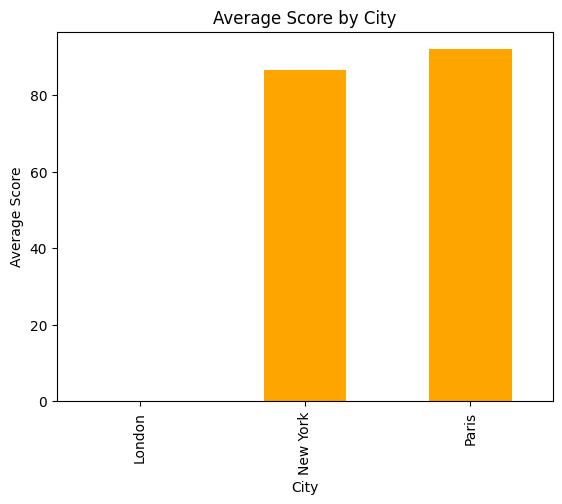

In [ ]:
mean_score_by_city = df_students.groupby('City')['Score'].mean()
mean_score_by_city.plot(kind='bar', title='Average Score by City', color='orange')
plt.ylabel('Average Score')
plt.show()

## 11. Challenge: Try It Yourself!

1. **Filtering**: Filter `df_students` to only show rows where `Score` is above 80.
2. **Missing Data**: Fill Charlie’s missing score with a guessed value (e.g., 70).
3. **String Operation**: Create a new column that has the `City` in uppercase, or `'UNKNOWN'` if missing.
4. **Group By**: Group by `City` and calculate the mean and max `Score`.
5. **Lambda**: Use `apply()` with a lambda to build a custom string about each student.
6. **Plot**: Create **one** Matplotlib plot of your choice (e.g. bar chart, histogram) using the data.

Compare your output with your own expectations or share with classmates!

## 12. Summary

In this notebook, we explored **Pandas** data manipulation **plus** basic **Matplotlib** plotting:

1. Selecting and filtering data (loc, iloc, boolean masks)
2. Handling missing data (dropna, fillna)
3. String operations
4. Grouping and aggregating
5. Merging DataFrames
6. Lambda functions (`apply()`)
7. Date/Time manipulations (extracting month, year, etc.)
8. **Plotting** bar charts and histograms

These skills form a **foundation** for more advanced data analysis in Python. Keep practicing, and you’ll be slicing, dicing, and visualizing data like a pro in no time!